In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from matplotlib import colors
from matplotlib import figure
from scipy.stats import beta
%matplotlib inline

In [3]:
#number of feature vectors
B = 10
#number of prototype vectors
K = 5

r = np.ones(K)
r = r / sum(r)

c=np.ones(B)
c = c / sum(c)

In [4]:
#homogeneous transport matrix
T = np.outer(r,c)
print(T)

[[0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02]
 [0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02]
 [0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02]
 [0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02]
 [0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02]]


In [5]:
# initialize random transport matrix for sinkhorn algorithm
T = np.random.rand(len(r),len(c))

In [6]:
T

array([[0.85811131, 0.61379765, 0.49025016, 0.52191159, 0.24614216,
        0.30585309, 0.8223099 , 0.47519138, 0.9336838 , 0.02363101],
       [0.6405536 , 0.18651301, 0.77235808, 0.15534244, 0.31954659,
        0.1826595 , 0.89073203, 0.75504167, 0.46652758, 0.82141732],
       [0.55643289, 0.70646399, 0.53431879, 0.03424573, 0.6414344 ,
        0.44132813, 0.71844648, 0.91856574, 0.02957355, 0.15221458],
       [0.55468908, 0.50182646, 0.23106301, 0.76109525, 0.18633066,
        0.81269111, 0.21338563, 0.16703053, 0.54497014, 0.37669505],
       [0.81659194, 0.70021634, 0.86246964, 0.5691852 , 0.11749088,
        0.66587736, 0.57127586, 0.54655544, 0.12349224, 0.40655904]])

# Sinkhorn algorithm from https://michielstock.github.io/posts/2017/2017-11-5-OptimalTransport/

In [7]:
def compute_optimal_transport(T, r, c, lam, epsilon=1e-8):
    """
    Computes the optimal transport matrix and Slinkhorn distance using the
    Sinkhorn-Knopp algorithm

    Inputs:
        - M : cost matrix (n x m)
        - r : vector of marginals (n, )
        - c : vector of marginals (m, )
        - lam : strength of the entropic regularization
        - epsilon : convergence parameter

    Outputs:
        - P : optimal transport matrix (n x m)
        - dist : Sinkhorn distance
    """
    n, m = T.shape
    P = np.exp(- lam * T)
    P /= P.sum()
    u = np.zeros(n)
    # normalize this matrix
    while np.max(np.abs(u - P.sum(1))) > epsilon:
        u = P.sum(1)
        P *= (r / u).reshape((-1, 1))
        P *= (c / P.sum(0)).reshape((1, -1))
    return P, np.sum(P * T)

In [8]:
transport_plan_10 = compute_optimal_transport(T,r,c,10)[0]
transport_plan_7 = compute_optimal_transport(T,r,c,7)[0]
transport_plan_4 = compute_optimal_transport(T,r,c,4)[0]
transport_plan_1 = compute_optimal_transport(T,r,c,1)[0]

In [9]:
#ensure we have a valid transport plan
print(transport_plan_4)
print(np.sum(transport_plan_4,axis = 0))
print(np.sum(transport_plan_4,axis = 1))

[[0.01130251 0.01270442 0.0267458  0.0088462  0.0224518  0.03145195
  0.00812646 0.02395198 0.00146818 0.0529507 ]
 [0.02266989 0.0589607  0.00726979 0.03220259 0.01406283 0.04325087
  0.00519252 0.00656946 0.00799192 0.00182942]
 [0.0294267  0.00683085 0.01746618 0.04846373 0.00359795 0.01424954
  0.00959021 0.00316679 0.04254784 0.02466021]
 [0.02088799 0.01091672 0.04141265 0.00186585 0.01565949 0.00227407
  0.05097234 0.04511231 0.00381652 0.00708207]
 [0.01571291 0.01058731 0.00710558 0.00862163 0.04422793 0.00877358
  0.02611846 0.02119946 0.04417553 0.01347761]]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[0.2 0.2 0.2 0.2 0.2]


# Visualize the effect of epsilon

Text(0.5, 1.0, 'Feature assignments')

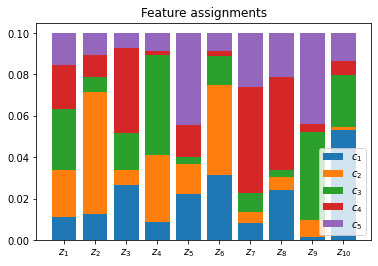

In [21]:
fig, ax = plt.subplots()
labels = [r'$z_1$',r'$z_2$', r'$z_3$', r'$z_4$',r'$z_5$',r'$z_6$',r'$z_7$',r'$z_8$',r'$z_9$',r'$z_{10}$']
ax.bar(labels,transport_plan_4[0,:],label=r'$c_1$')
ax.bar(labels,transport_plan_4[1,:],bottom= transport_plan_4[0,:],label=r'$c_2$')
ax.bar(labels,transport_plan_4[2,:],bottom= transport_plan_4[0,:]+ transport_plan_4[1,:],
       label=r'$c_3$')
ax.bar(labels,transport_plan_4[3,:],bottom= transport_plan_4[0,:]+ transport_plan_4[1,:]+ transport_plan_4[2,:], label=r'$c_4$')
ax.bar(labels,transport_plan_4[4,:],bottom= transport_plan_4[0,:]+ transport_plan_4[1,:]+ transport_plan_4[2,:] + transport_plan_4[3,:], label=r'$c_5$')

plt.legend()
plt.title("Feature assignments")

# Alternate Visualization for different values of epsilon 

In [22]:
def vis_plan(transport_plan,lam):
    fig, ax = plt.subplots()
    labels = [r'$z_1$',r'$z_2$', r'$z_3$', r'$z_4$',r'$z_5$',r'$z_6$',r'$z_7$',r'$z_8$',r'$z_9$',r'$z_{10}$']

    ax.bar(labels,transport_plan[0,:],label=r'$c_1$')
    ax.bar(labels,transport_plan[1,:],bottom= transport_plan[0,:],label=r'$c_2$')
    ax.bar(labels,transport_plan[2,:],bottom= transport_plan[0,:]+ transport_plan[1,:],label=r'$c_3$')
    ax.bar(labels,transport_plan[3,:],bottom= transport_plan[0,:]+ transport_plan[1,:]+ transport_plan[2,:], label=r'$c_4$')
    ax.bar(labels,transport_plan[4,:],bottom= transport_plan[0,:]+ transport_plan[1,:]+ transport_plan[2,:] + transport_plan[3,:], label=r'$c_5$')
    ax.set_title(f'Transport Plan $\epsilon$ = {lam}')
    ax.legend()
    plt.show()

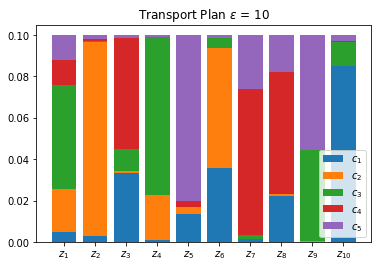

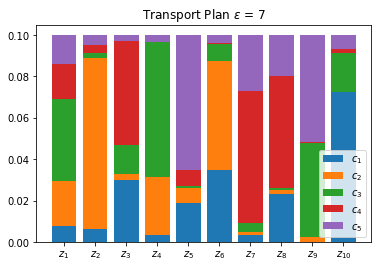

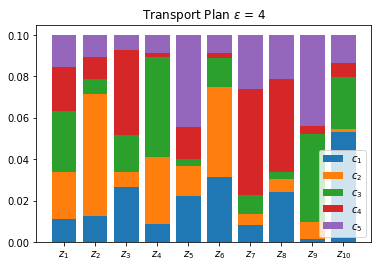

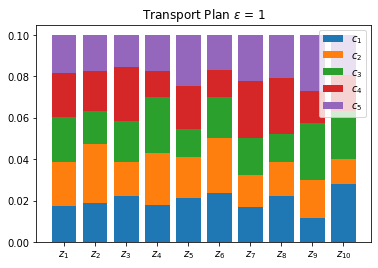

In [23]:
vis_plan(transport_plan_10,10)
vis_plan(transport_plan_7,7)
vis_plan(transport_plan_4,4)
vis_plan(transport_plan_1,1)



In [ ]:

fig, axs = plt.subplots(1, 2, figsize=(10,5))
plt.figure(figsize=(9,3))

x = np.linspace(-12,12, 100)


# N is the count in each bin, bins is the lower-limit of the bin
r = norm.rvs(1,4,size=1000)

N, bins, patches = axs[0].hist(r, bins=10,density = True)
axs[0].plot(x, norm.pdf(x,1,4),
       'r-', lw=5, alpha=0.6, label='norm pdf')
# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
normalize = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for num, thispatch in zip(np.arange(len(patches)), patches):
    if num == 5:
        color = plt.cm.viridis(normalize(fracs[3]))
        thispatch.set_facecolor(color)
    else:
        color = plt.cm.viridis(normalize(fracs[1]))
        thispatch.set_facecolor(color)
  

# We can also normalize our inputs by the total number of counts
r = beta.rvs(2,2,size=1000)

N, bins, patches = axs[1].hist(r, bins=10, density=True)


for num, thispatch in zip(np.arange(len(patches)), patches):
    if num == 3:
        color = plt.cm.viridis(normalize(fracs[3]))
        thispatch.set_facecolor(color)
    else:
        color = plt.cm.viridis(normalize(fracs[1]))
        thispatch.set_facecolor(color)
  

x = np.linspace(0,1, 100)
axs[1].plot(x, beta.pdf(x,2,2),
       'r-', lw=5, alpha=0.6, label='norm pdf')
axs[1].axes.xaxis.set_visible(False)
axs[0].axes.xaxis.set_visible(False)
axs[1].axes.yaxis.set_visible(False)
axs[0].axes.yaxis.set_visible(False)

In [ ]:

fig, axs = plt.subplots(1, 2, figsize=(10,5))
plt.figure(figsize=(9,3))

x = np.linspace(-12,12, 100)


# N is the count in each bin, bins is the lower-limit of the bin
r = norm.rvs(1,4,size=1000)

N, bins, patches = axs[0].hist(r, bins=10,density = True)
axs[0].plot(x, norm.pdf(x,1,4),
       'r-', lw=5, alpha=0.6, label='norm pdf')
# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
normalize = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for num, thispatch in zip(np.arange(len(patches)), patches):
    if num == 5:
        color = plt.cm.viridis(normalize(fracs[3]))
        thispatch.set_facecolor(color)
    else:
        color = plt.cm.viridis(normalize(fracs[1]))
        thispatch.set_facecolor(color)
  

# We can also normalize our inputs by the total number of counts
r = beta.rvs(2,2,size=1000)

N, bins, patches = axs[1].hist(r, bins=10, density=True)


for num, thispatch in zip(np.arange(len(patches)), patches):
    if num == 0 or num == 1:
        color = plt.cm.viridis(normalize(fracs[3]))
        thispatch.set_facecolor(color)
    else:
        color = plt.cm.viridis(normalize(fracs[1]))
        thispatch.set_facecolor(color)
  

x = np.linspace(0,1, 100)
axs[1].plot(x, beta.pdf(x,2,2),
       'r-', lw=5, alpha=0.6, label='norm pdf')
axs[1].axes.xaxis.set_visible(False)
axs[0].axes.xaxis.set_visible(False)
axs[1].axes.yaxis.set_visible(False)
axs[0].axes.yaxis.set_visible(False)